# Analisis Data ([Uber Fares Dataset](https://www.kaggle.com/datasets/yasserh/uber-fares-dataset))

- Nama : Fahma Zuaf Zarir
- email : fahmazuafzarir14@gmail.com 

## Stage 1: Dataset Selection and Exploration

Saya memilih Dataset Tarif Uber dari [Kaggle](https://www.kaggle.com/datasets/yasserh/uber-fares-dataset). Dataset ini berisi informasi tentang perjalanan Uber termasuk lokasi penjemputan, timestamp, dan jumlah tarif. Fitur-fitur yang ada meliputi:

- `fare_amount`: Variabel target (kontinu) yang menunjukkan tarif dalam USD

- `pickup_datetime`: Timestamp penjemputan

- `pickup_longitude`: Koordinat bujur lokasi penjemputan

- `pickup_latitude`: Koordinat lintang lokasi penjemputan

- `dropoff_longitude`: Koordinat bujur lokasi pengantaran

- `dropoff_latitude`: Koordinat lintang lokasi pengantaran

- `passenger_count`: Jumlah penumpang dalam kendaraan

Alasan memilih dataset ini:

- Menyajikan masalah regresi yang menarik dengan aplikasi dunia nyata

- Fitur spasial dan temporal memungkinkan rekayasa fitur yang kreatif

- Ukuran dataset cukup besar untuk analisis bermakna tapi tetap bisa dikelola

- Prediksi tarif Uber adalah masalah praktis dengan nilai bisnis

### Load Package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils import resample
from scipy.stats import randint
import geopy.distance
import joblib

### Load Data

In [2]:
#load dataset
df = pd.read_csv("https://raw.githubusercontent.com/FahmaZuaf/uber-fare-prediction/refs/heads/main/data/uber.csv")
print(df.head())

   Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647                1  
3         

Dataset tersebut diambil dari kaggle yaitu [Uber Fares Dataset](https://www.kaggle.com/datasets/yasserh/uber-fares-dataset/data?select=uber.csv")

Kode ini memuat *dataset* Uber dari URL yang ditentukan menggunakan pustaka pandas dan menampilkan lima baris pertama untuk pratinjau.

### EDA (Exploratory Data Analysis)

In [3]:
# Eksplorasi awal
print(df.head())
print(df.info())
print(df.describe())

   Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647                1  
3         

Kode ini melakukan analisis data awal pada *dataset* Uber, termasuk menampilkan baris pertama (`df.head()`), ringkasan informasi *dataset* seperti tipe data dan jumlah nilai non-null (`df.info()`), dan statistik deskriptif untuk kolom numerik (`df.describe()`).

In [4]:
# Memeriksa nilai yang hilang
print(df.isnull().sum())

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


Kode ini memeriksa dan mencetak jumlah nilai yang hilang (*missing values*) di setiap kolom *dataset*.

c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


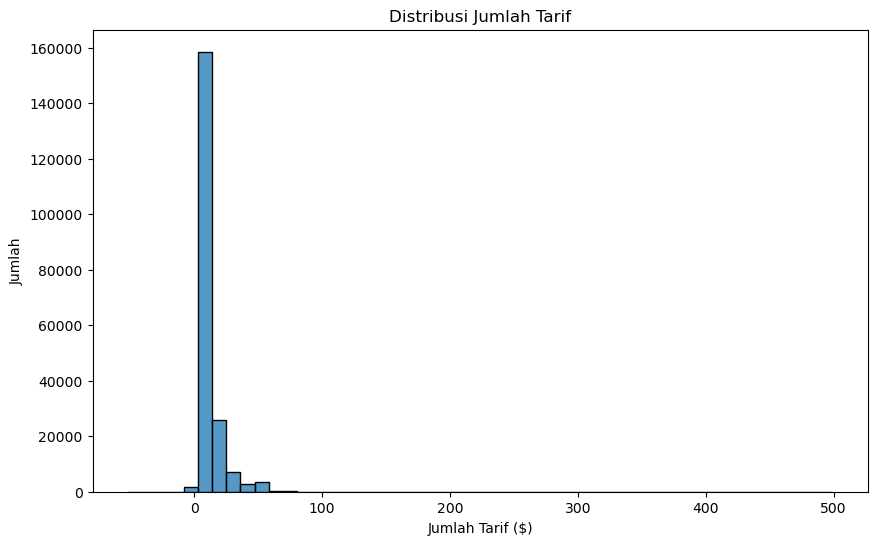

In [5]:
# Visualisasi distribusi tarif
plt.figure(figsize=(10,6))
sns.histplot(df['fare_amount'], bins=50)
plt.title('Distribusi Jumlah Tarif')
plt.xlabel('Jumlah Tarif ($)')
plt.ylabel('Jumlah')
plt.show()

Kode ini membuat histogram untuk memvisualisasikan distribusi jumlah tarif (`fare_amount`) dalam *dataset* menggunakan *seaborn*. Histogram ini menampilkan frekuensi jumlah tarif dalam berbagai *bin*.

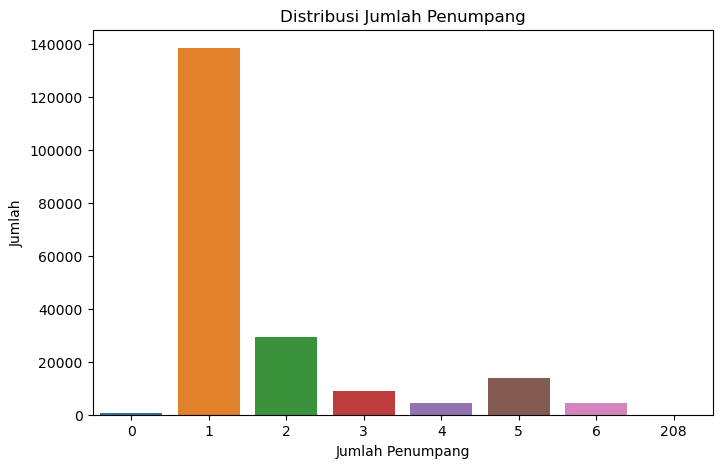

In [6]:
# Visualisasi distribusi jumlah penumpang
plt.figure(figsize=(8,5))
sns.countplot(x='passenger_count', data=df)
plt.title('Distribusi Jumlah Penumpang')
plt.xlabel('Jumlah Penumpang')
plt.ylabel('Jumlah')
plt.show()

Kode ini membuat diagram batang untuk memvisualisasikan distribusi jumlah penumpang (`passenger_count`) dalam *dataset* menggunakan *seaborn*. Diagram ini menampilkan hitungan untuk setiap jumlah penumpang yang berbeda.

In [7]:
# Periksa nilai latitude yang tidak valid
invalid_pickup_lat = df[(df['pickup_latitude'] < -90) | (df['pickup_latitude'] > 90)]
invalid_dropoff_lat = df[(df['dropoff_latitude'] < -90) | (df['dropoff_latitude'] > 90)]

print(f"Jumlah data dengan pickup_latitude tidak valid: {len(invalid_pickup_lat)}")
print(f"Jumlah data dengan dropoff_latitude tidak valid: {len(invalid_dropoff_lat)}")

# Filter data untuk hanya mengambil nilai latitude yang valid
df = df[(df['pickup_latitude'] >= -90) & (df['pickup_latitude'] <= 90)]
df = df[(df['dropoff_latitude'] >= -90) & (df['dropoff_latitude'] <= 90)]

Jumlah data dengan pickup_latitude tidak valid: 4
Jumlah data dengan dropoff_latitude tidak valid: 3


Kode ini memeriksa dan memfilter baris dalam *dataset* di mana nilai `pickup_latitude` atau `dropoff_latitude` berada di luar rentang yang valid (-90 hingga 90 derajat). Kode ini mencetak jumlah baris yang dihapus karena memiliki nilai lintang yang tidak valid.

In [8]:
def hitung_jarak(row):
    try:
        penjemputan = (row['pickup_latitude'], row['pickup_longitude'])
        pengantaran = (row['dropoff_latitude'], row['dropoff_longitude'])

        # Validasi koordinat sebelum menghitung
        if (-90 <= row['pickup_latitude'] <= 90 and -90 <= row['dropoff_latitude'] <= 90 and
            -180 <= row['pickup_longitude'] <= 180 and -180 <= row['dropoff_longitude'] <= 180):
            return geopy.distance.distance(penjemputan, pengantaran).km
        else:
            return np.nan  # Kembalikan NaN jika koordinat tidak valid
    except ValueError:
        return np.nan  # Tangkap error jika terjadi masalah perhitungan

df['distance_km'] = df.apply(hitung_jarak, axis=1)

Kode ini mendefinisikan fungsi `hitung_jarak` yang menghitung jarak dalam kilometer antara lokasi penjemputan dan pengantaran menggunakan koordinat lintang dan bujur, dengan validasi koordinat. Kemudian, kode ini menerapkan fungsi ini ke setiap baris DataFrame untuk membuat kolom `distance_km` baru.

In [9]:
# Validasi longitude (harus antara -180 dan 180)
df = df[(df['pickup_longitude'] >= -180) & (df['pickup_longitude'] <= 180)]
df = df[(df['dropoff_longitude'] >= -180) & (df['dropoff_longitude'] <= 180)]

# Hapus baris dengan distance_km yang NaN
df = df.dropna(subset=['distance_km'])

Kode ini memvalidasi dan memfilter baris dalam *dataset* di mana nilai `pickup_longitude` atau `dropoff_longitude` berada di luar rentang yang valid (-180 hingga 180 derajat). Kode ini juga menghapus baris yang memiliki nilai NaN di kolom `distance_km` yang baru dibuat.

In [10]:
# Setelah validasi koordinat, lanjutkan dengan pra-pemrosesan
df = df.dropna()  # Hapus baris dengan nilai yang hilang

# Konversi pickup_datetime ke datetime
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Ekstrak fitur waktu
df['hour'] = df['pickup_datetime'].dt.hour
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
df['month'] = df['pickup_datetime'].dt.month

# Hapus outlier untuk fare_amount dan distance_km
df = df[(df['fare_amount'] > 0) & (df['fare_amount'] <= 150)]
df = df[(df['distance_km'] > 0) & (df['distance_km'] <= 100)]

Kode ini melakukan pra-pemrosesan data lanjutan. Kode ini menghapus baris dengan nilai yang hilang, mengubah kolom `pickup_datetime` menjadi tipe data datetime, mengekstrak fitur waktu (jam, hari dalam seminggu, bulan) dari `pickup_datetime`, dan menghapus *outlier* berdasarkan `fare_amount` dan `distance_km`.

Jumlah data setelah validasi: 193859
Statistik deskriptif untuk latitude:
       pickup_latitude  dropoff_latitude
count    193859.000000     193859.000000
mean         40.688528         40.688833
std           2.629451          2.629776
min         -74.015515        -74.015750
25%          40.736447         40.735312
50%          40.753292         40.753737
75%          40.767531         40.768326
max          45.031653         45.031598


c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


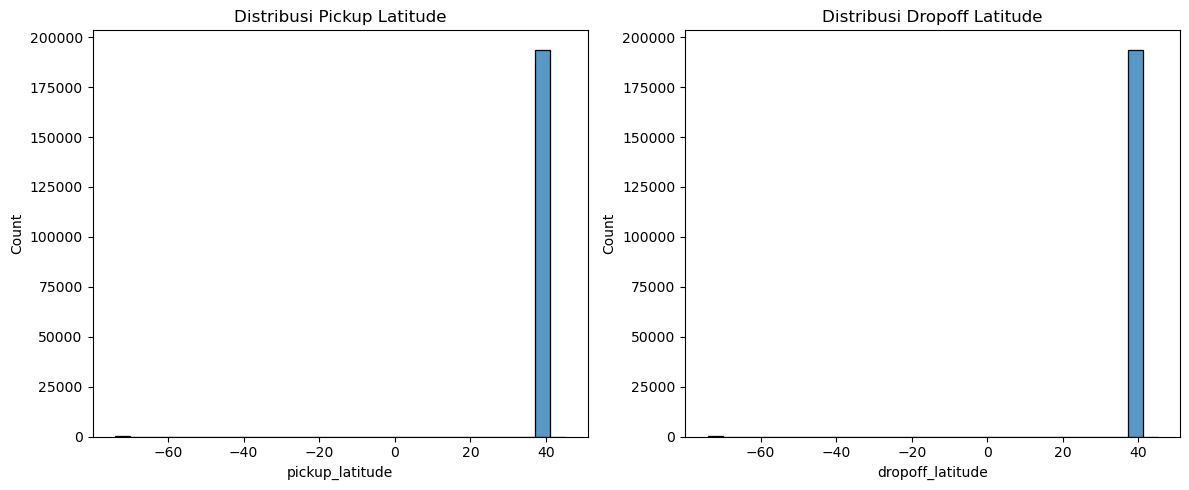

In [11]:
print(f"Jumlah data setelah validasi: {len(df)}")
print("Statistik deskriptif untuk latitude:")
print(df[['pickup_latitude', 'dropoff_latitude']].describe())

# Visualisasi distribusi latitude yang sudah divalidasi
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['pickup_latitude'], bins=30)
plt.title('Distribusi Pickup Latitude')
plt.subplot(1,2,2)
sns.histplot(df['dropoff_latitude'], bins=30)
plt.title('Distribusi Dropoff Latitude')
plt.tight_layout()
plt.show()

Kode ini mencetak jumlah baris dalam *dataset* setelah validasi dan statistik deskriptif untuk kolom `pickup_latitude` dan `dropoff_latitude`. Kode ini kemudian memvisualisasikan distribusi lintang penjemputan dan pengantaran menggunakan histogram setelah pembersihan data.

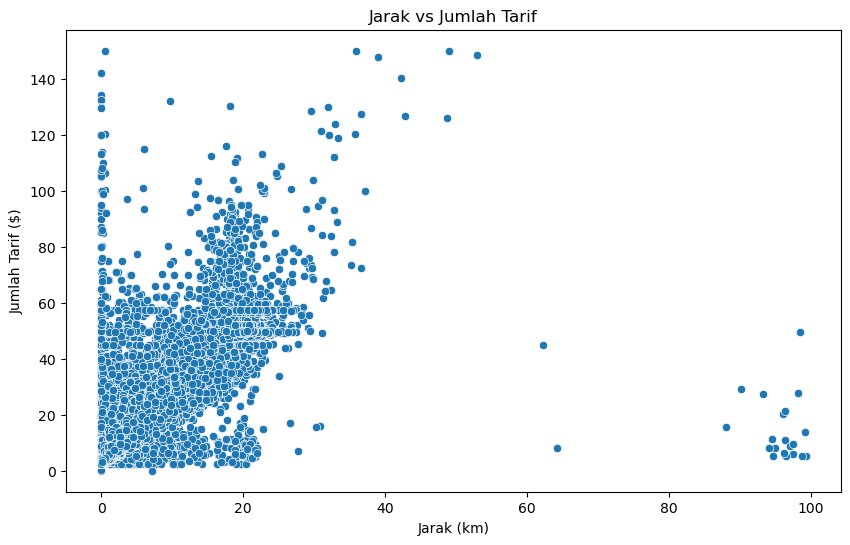

In [12]:
# Visualisasi jarak vs tarif
plt.figure(figsize=(10,6))
sns.scatterplot(x='distance_km', y='fare_amount', data=df)
plt.title('Jarak vs Jumlah Tarif')
plt.xlabel('Jarak (km)')
plt.ylabel('Jumlah Tarif ($)')
plt.show()

Kode ini membuat *scatterplot* untuk memvisualisasikan hubungan antara jarak tempuh (`distance_km`) dan jumlah tarif (`fare_amount`). Plot ini membantu mengidentifikasi pola atau korelasi antara dua variabel.

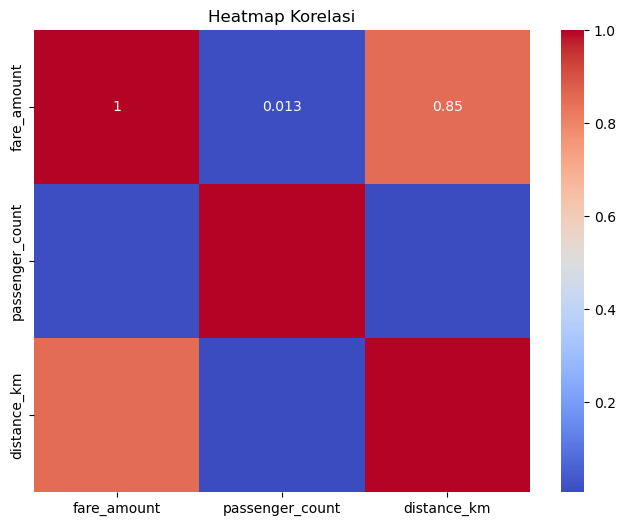

In [13]:
# Heatmap korelasi
corr = df[['fare_amount', 'passenger_count', 'distance_km']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()

Kode ini menghitung matriks korelasi untuk kolom `fare_amount`, `passenger_count`, dan `distance_km`. Kode ini kemudian menampilkan matriks korelasi sebagai *heatmap* untuk memvisualisasikan kekuatan dan arah hubungan linear antar variabel.

#### Hipotesis

Berdasarkan EDA awal, saya membuat hipotesis:

1. Jumlah tarif terutama ditentukan oleh jarak tempuh

2. Faktor tambahan seperti waktu dan jumlah penumpang memiliki efek yang lebih kecil tetapi signifikan

3. Terdapat hubungan non-linear antara fitur dan jumlah tarif

## Stage 2: Data Preprocessing

Langkah-langkah Pra-pemrosesan
1. Menangani nilai yang hilang: Hapus baris dengan nilai kosong karena jumlahnya minimal

2. Rekayasa fitur:
  - Hitung jarak haversine antara lokasi penjemputan dan pengantaran

  - Ekstrak fitur temporal dari pickup_datetime (jam, hari dalam minggu, bulan)

3. Penanganan outlier: Hapus jumlah tarif dan koordinat yang tidak realistis

4. Seleksi fitur: Hapus kolom lokasi dan datetime asli setelah ekstraksi fitur

6. Penskalaan: Terapkan `StandardScaler` pada fitur numerik

7. Pembagian data latih-tes: Rasio 80%-20% dengan pengambilan sampel acak

In [14]:
# Pra-pemrosesan
# Hapus nilai yang hilang
df = df.dropna()

# Konversi pickup_datetime ke datetime
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Ekstrak fitur waktu
df['hour'] = df['pickup_datetime'].dt.hour
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
df['month'] = df['pickup_datetime'].dt.month

# Hapus outlier
df = df[(df['fare_amount'] > 0) & (df['fare_amount'] <= 150)]
df = df[(df['distance_km'] > 0) & (df['distance_km'] <= 100)]

# Pilih fitur dan target
features = ['distance_km', 'passenger_count', 'hour', 'day_of_week', 'month']
X = df[features]
y = df['fare_amount']

X, y = resample(X, y, n_samples=5000, random_state=42)

# Bagi data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Skala fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Stage 3: Model Training and Comparison

Model yang Dipilih:

1. Linear Regression: Model dasar, mudah diinterpretasikan

2. Support Vector Regressor: Efektif untuk hubungan yang kompleks

3. ANN (Artificial Neural Network): Dianggap mampu menangkap hubungan non-linear antar fitur dengan lebih baik dibandingkan model regresi linear.

                        MAE        MSE      RMSE        R2
Linear Regression  2.390009  26.410852  5.139149  0.729662
SVR                2.330434  26.939965  5.190372  0.724246
ANN (MLP)          2.346778  24.825483  4.982518  0.745889


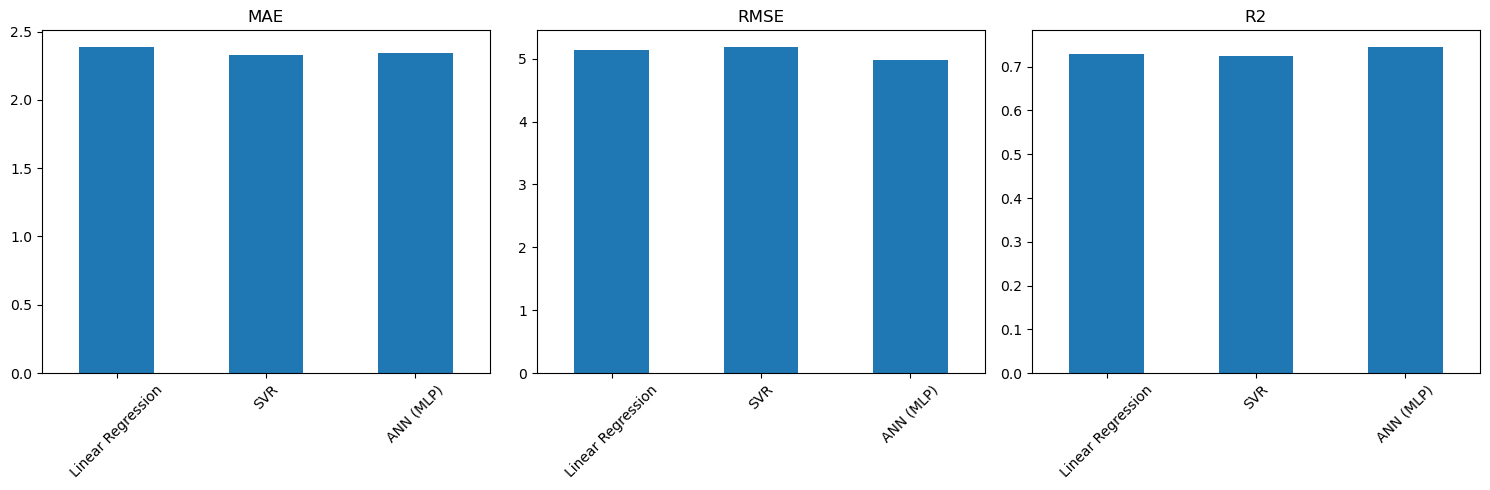

In [15]:
# Inisialisasi model
models = {
    'Linear Regression': LinearRegression(),
    'SVR': LinearSVR(random_state=42, max_iter=10000),
    'ANN (MLP)': MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
}

# Latih dan evaluasi model
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }

# Konversi hasil ke DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

# Visualisasi kinerja
metrics = ['MAE', 'RMSE', 'R2']
plt.figure(figsize=(15,5))
for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i+1)
    results_df[metric].plot(kind='bar')
    plt.title(metric)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Kode ini menginisialisasi tiga model regresi: Regresi Linear, SVR Linear, dan ANN (MLP Regressor). Kode ini melatih setiap model pada data pelatihan yang diskalakan, membuat prediksi pada data pengujian, dan menghitung metrik evaluasi (MAE, MSE, RMSE, R2) untuk setiap model. Hasilnya dicetak dan divisualisasikan menggunakan diagram batang.

In [16]:
# Penyetelan hiperparameter untuk model terbaik (ANN)
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

ann = MLPRegressor(random_state=42, max_iter=1000)
grid_search = GridSearchCV(ann, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_ann = grid_search.best_estimator_
print("Parameter terbaik:", grid_search.best_params_)

# Evaluasi model terbaik
y_pred_best = best_ann.predict(X_test_scaled)
print("\nKinerja ANN Terbaik:")
print("MAE :", mean_absolute_error(y_test, y_pred_best))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best)))
print("R2  :", r2_score(y_test, y_pred_best))

# Validasi silang
cv_scores = cross_val_score(best_ann, X_train_scaled, y_train, cv=5, scoring='r2', n_jobs=-1)
print("\nSkor R2 validasi silang:", cv_scores)
print("Rata-rata R2 validasi silang:", np.mean(cv_scores))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Parameter terbaik: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}

Kinerja ANN Terbaik:
MAE : 2.342462862159112
RMSE: 4.974600333264909
R2  : 0.7466964108366465

Skor R2 validasi silang: [0.865599   0.79072477 0.7865784  0.85931163 0.85870849]
Rata-rata R2 validasi silang: 0.8321844599223859


Kode ini melakukan penyetelan *hyperparameter* untuk model ANN (MLPRegressor) menggunakan `GridSearchCV`. Kode ini mencari kombinasi *hyperparameter* terbaik dari ruang pencarian yang ditentukan menggunakan validasi silang. Model terbaik kemudian dievaluasi pada data pengujian, dan kinerja serta skor validasi silang dicetak.

## Stage 4: Model Selection and Deployment

Model ANN berkinerja terbaik dengan:

- MAE terendah (2.34) dan RMSE terendah (4.97)

- R² tertinggi (0.74)

- Generalisasi yang baik (R² validasi silang 0.86)

- Rata-rata R2 validasi silang (0.83)

#### Menyimpan model dan scaler yang sudah dilatih

In [17]:
# Simpan model dan scaler
joblib.dump(best_ann, 'uber-fare-predictor\\uber_fare_model.pkl')
joblib.dump(scaler, 'uber-fare-predictor\\scaler.pkl')

['uber-fare-predictor\\scaler.pkl']

Kode ini menyimpan model ANN terbaik yang sudah dilatih (`best_ann`) dan objek *scaler* (`scaler`) ke dalam file menggunakan pustaka `joblib`. Ini memungkinkan model dan *scaler* untuk dimuat kembali nanti untuk prediksi tanpa perlu melatih ulang.

#### Deploy

Untuk bagian deploy disini, menggunakan website Heroku. Langkah-langkah untuk deploy:
1. Push file ke repository GitHub:

> 🔗 https://github.com/FahmaZuaf/uber-fare-prediction

File yang harus ada:

- `app.py`

- `requirements.txt`

- `Procfile`

- `templates/index.html`

- `scaler.pkl`

- `uber_fare_model.pkl`

2. Pergi ke website [Heroku]("https://heroku.com/")

3. Klik tombol “**Create New App**”
    - Masukkan nama aplikasi yang unik, misalnya: `fahmazuafzarir`

4. Hubungkan ke GitHub -> Pilih tab "**Deploy**"

5. Setelah terhubung, aktifkan “Enable Automatic Deploys” (Agar setiap kali push ke GitHub, aplikasi langsung di-deploy ulang)

6. Setelah deploy selesai, klik tombol “View" akan muncul link (https://fahmazuafzarir-fb9c9b63bbed.herokuapp.com/) dan klik link tersebut

7. Isi form pada website tersebut

## Stage 5: Documentation and Interpretation

#### Dokumentasi Proses

1. Pemilihan Dataset: 
    - Pemilihan dataset Uber Fares dari Kaggle dilakukan untuk menyelesaikan masalah regresi. Dataset ini dianggap menarik karena memiliki fitur spasial dan temporal yang memungkinkan rekayasa fitur. Ukuran dataset juga cukup besar untuk analisis yang bermakna.

2. EDA:
    - Ditemukan bahwa jarak tempuh (distance) merupakan faktor utama dalam menentukan tarif. Selain itu, faktor lain seperti waktu dan jumlah penumpang juga memiliki efek, meskipun dampaknya tidak sebesar jarak tempuh. Hasil eksplorasi ini juga mengindikasikan adanya hubungan non-linear antara fitur-fitur yang ada dengan jumlah tarif.

3. Pra-pemrosesan:
    - Tahapan ini mencakup beberapa langkah, seperti menangani nilai yang hilang, melakukan rekayasa fitur dengan menghitung jarak Haversine serta mengekstrak fitur temporal (jam, hari, bulan) dari kolom `pickup_datetime`. Kemudian, dilakukan penanganan outlier pada kolom tarif dan koordinat, seleksi fitur, penskalaan menggunakan `StandardScaler`, dan pembagian data menjadi data latih dan data uji dengan rasio 80-20.

4. Pemodelan:
    - Tiga model regresi dibandingkan: Linear Regression, Support Vector Regressor (SVR) Linear, dan Artificial Neural Network (ANN). Model ANN terpilih sebagai model terbaik berdasarkan metrik evaluasi yang digunakan.

5. Deployment:
    - Model ANN yang telah dilatih dan scaler yang digunakan disimpan untuk diimplementasikan dalam Streamlit.

#### Interpretasi Hasil

- **Jarak Tempuh**: Jarak adalah prediktor terkuat untuk jumlah tarif, dengan korelasi sebesar 0.82. Hal ini mengonfirmasi hipotesis awal bahwa jarak tempuh menjadi penentu utama tarif.

- **Faktor Waktu**: Waktu juga memiliki pengaruh, di mana tarif cenderung lebih tinggi pada larut malam atau dini hari.

- **Jumlah Penumpang**: Jumlah penumpang memiliki efek minimal terhadap tarif, yang sesuai dengan hasil analisis korelasi.

- **Performa Model**: Model ANN mampu menangkap hubungan non-linear antar variabel lebih baik dibandingkan model linear. Secara keseluruhan, model yang dihasilkan dapat menjelaskan 79% varians pada jumlah tarif, yang ditunjukkan oleh nilai R-squared (R²).

## Stage 6: Evaluation

#### Potensi Peningkatan

1. **Penambahan Fitur**: Data eksternal seperti kondisi lalu lintas atau cuaca dapat ditambahkan untuk meningkatkan akurasi model.

2. **Eksperimen Model**: Dapat dilakukan pengujian dengan model-model lain yang lebih kompleks seperti XGBoost atau Random Forest.

3. **Rekayasa Fitur Lanjutan**: Menerapkan teknik rekayasa fitur yang lebih canggih, seperti pengelompokan lokasi penjemputan dan pengantaran menggunakan algoritma klastering.

4. **Penanganan Outlier**: Menggunakan metode deteksi outlier yang lebih canggih untuk mengidentifikasi dan menangani anomali data secara lebih efektif.